# mount google drive

In [133]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# set working directory

In [3]:
import os
os.chdir("/home/michael/github/CC0325/codes/matmat")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
# set theme, white background
sns.set_theme(style="whitegrid")

In [5]:
def plot_polynomial_fit(df, column_name, column_values, degree=2):
    # Fit a polynomial to the data
    coefficients = np.polyfit(df[column_name], df[column_values], degree)
    poly = np.poly1d(coefficients)

    # Show the polynomial fit equation
    x = sp.Symbol('x')
    poly_equation = sp.Poly(poly(x), x)
    print(f"Polynomial Fit Equation: {poly_equation}")

    # Plot the data points
    sns.scatterplot(data=df, x=column_name, y=column_values, marker='o', label='Data Points')

    # Plot the polynomial fit, dashed line
    sns.lineplot(data=df, x=column_name, y=poly(df[column_name]), label='Poly Fit', linestyle='--')

    plt.legend()
    plt.show()


In [6]:
!make clean
!make run

# read the output file
df = pd.read_csv('output.csv')
df.head()

rm -f matmat.bin
g++ -std=c++11 -Wall -Wextra -O2 matmat.cpp -lblas -o matmat.bin
./matmat.bin
MatrixSize,BlockSize,Time(s),Speedup
128,1,0.005661,1
256,1,0.072174,1
384,1,0.210562,1
512,1,0.635800,1
640,1,1.161239,1
768,1,1.993267,1
896,1,3.293673,1
1024,1,12.980520,1
1024,2,14.168172,0.916175
1024,4,4.961153,2.616432
1024,8,2.676345,4.850092
1024,16,2.412187,5.381225
1024,32,2.946636,4.405200


,MatrixSize,BlockSize,Time(s),Speedup
0,128,1,0.005661,1.0
1,256,1,0.072174,1.0
2,384,1,0.210562,1.0
3,512,1,0.635800,1.0
4,640,1,1.161240,1.0


Polynomial Fit Equation: Poly(7.30441307780716e-8*x**3 - 9.76382667706638e-5*x**2 + 0.0391979593890915*x - 4.05734071428568, x, domain='RR')


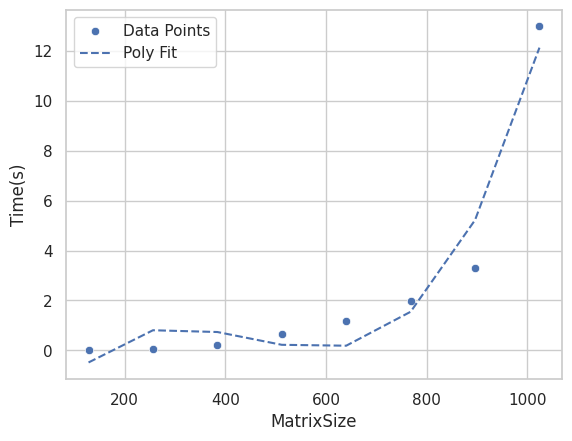

In [9]:
df_filtered = df[df['BlockSize'] == 1]
plot_polynomial_fit(df_filtered, 'MatrixSize', 'Time(s)', degree=3)

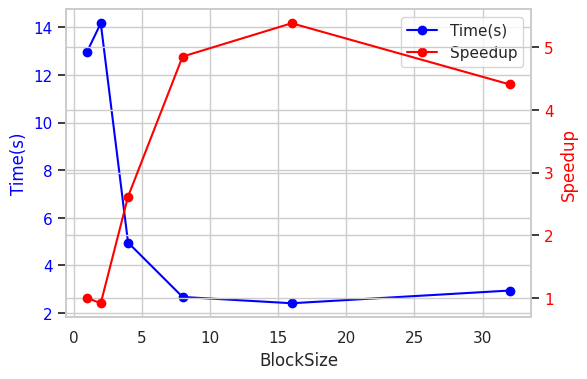

In [12]:
df_filtered = df[df['MatrixSize'] == 1024]

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot Time(s) on primary axis (blue)
ax1.plot(df_filtered['BlockSize'], df_filtered['Time(s)'], marker='o', color='blue', label='Time(s)')
ax1.set_xlabel('BlockSize')
ax1.set_ylabel('Time(s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis (red) and plot Speedup
ax2 = ax1.twinx()
ax2.plot(df_filtered['BlockSize'], df_filtered['Speedup'], marker='o', color='red', label='Speedup')
ax2.set_ylabel('Speedup', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

In [14]:
import simple_cache
simple_cache.main()

      Cache Statistics      
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Metric          ┃  Value ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Cache Line Size │      4 │
│ Cache Size      │     64 │
│ Cache Hits      │  24576 │
│ Cache Misses    │  40960 │
│ Total Accesses  │  65536 │
│ Hit Rate        │ 37.50% │
└─────────────────┴────────┘

Cache hit and miss counters have been reset.

      Cache Statistics      
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Metric          ┃  Value ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Cache Line Size │      4 │
│ Cache Size      │     64 │
│ Cache Hits      │  53248 │
│ Cache Misses    │  12288 │
│ Total Accesses  │  65536 │
│ Hit Rate        │ 81.25% │
└─────────────────┴────────┘